In [1]:
# project setup
using Pkg;Pkg.activate(localprojectdir())
ENV["JULIA_DEBUG"] = ""

""

In [2]:
using BSplineExtension, Plots, LaTeXStrings, LinearAlgebra, FrameFunRBF

┌ Info: Recompiling stale cache file /Users/vincentcp/.julia/compiled/v1.1/BSplineExtension/6Y8mR.ji for BSplineExtension [0b21e58f-1780-5391-9880-11ae5a9ef91b]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/vincentcp/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184
┌ Info: Precompiling FrameFunRBF [82380ed4-efd5-5f5f-a249-13812989e62a]
└ @ Base loading.jl:1186


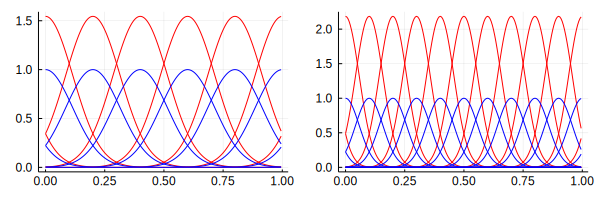

In [4]:
f = x->cos(100pi*x)
Ps = (eps)->(GaussSplinePlatform(3), RBFPETPlatform(Gaussian(1.);domain=0.0..1.0,select=RBFParLinear(eps)))
P1,P2 = Ps(sqrt(6/4))
plot(dictionary(P1,5);c="red",layout=2,subplot=1,size=(600,200),legend=false)
plot!(dictionary(P2,5);c="blue",subplot=1,legend=false)
plot!(dictionary(P1,10);c="red",layout=2,subplot=2,size=(600,200),legend=false)
plot!(dictionary(P2,10);c="blue",subplot=2,legend=false)

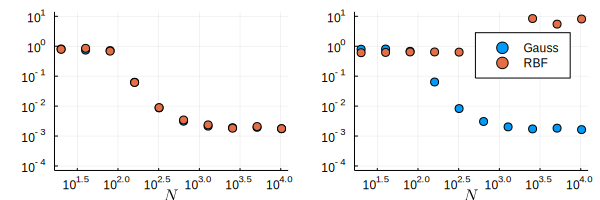

In [4]:
Ns = 10*[1<<k for k in 1:10]
err1 = [abserror(f, Fun(f,P,N)) for N in   Ns, P in Ps(sqrt(6/4))]
err2 = [abserror(f, Fun(f,P,N)) for N in   Ns, P in Ps(.1)]
scatter(Ns,err1,yscale=:log10,xscale=:log10;layout=2,subplot=1,
        ylims=[1e-4,10],legend=false,size=(600,200),xlabel=L"N")
scatter!(Ns,err2,yscale=:log10,xscale=:log10;layout=2,subplot=2,
        ylims=[1e-4,10],label=["Gauss","RBF"],xlabel=L"N")

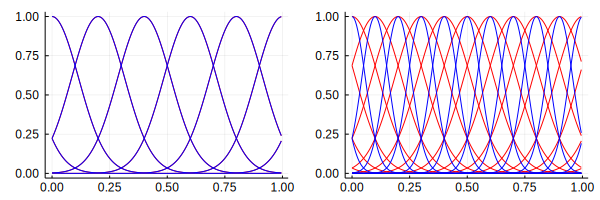

In [48]:
Ps = (eps)->(
        RBFPETPlatform(Gaussian(1.);domain=0.0..1.0,select=RBFParConstant(eps*5)),
        RBFPETPlatform(Gaussian(1.);domain=0.0..1.0,select=RBFParLinear(eps))
)

P1,P2 = Ps(sqrt(6/4))
plot(dictionary(P1,5);c="red",layout=2,subplot=1,size=(600,200),legend=false)
plot!(dictionary(P2,5);c="blue",subplot=1,legend=false)
plot!(dictionary(P1,10);c="red",layout=2,subplot=2,size=(600,200),legend=false)
plot!(dictionary(P2,10);c="blue",subplot=2,legend=false)

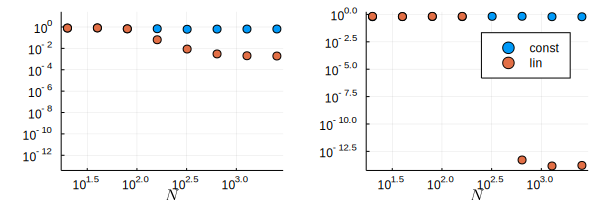

In [49]:
Ns = 10*[1<<k for k in 1:8]
err1 = [abserror(f, Fun(f,P,N;solverstyle=DirectStyle())) for N in Ns, P in Ps(sqrt(6/4))]
err2 = [abserror(f, Fun(f,P,N;solverstyle=DirectStyle())) for N in Ns, P in Ps(.1)]

scatter(Ns,err1,ylims=[1e-13,10],yscale=:log10,xscale=:log10;layout=2,subplot=1,
    legend=false,size=(600,200),xlabel=L"N")
scatter!(Ns,err2;yscale=:log10,xscale=:log10,label=["const","lin"],xlabel=L"N",subplot=2)

In [39]:
err2

8×2 Array{Float64,2}:
 0.624898  0.603905   
 0.662193  0.668475   
 0.620726  0.637929   
 0.65232   0.589618   
 0.636395  7.35397e-6 
 0.645653  5.79021e-14
 0.648788  1.60683e-14
 0.653248  1.81045e-14

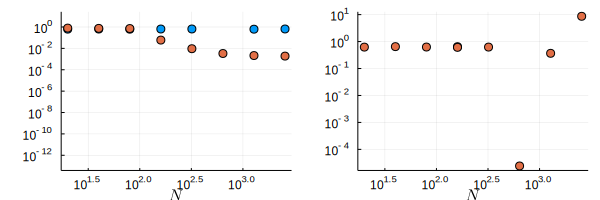

In [7]:
Ns = 10*[1<<k for k in 1:8]
err1 = [abserror(f, Fun(f,P,N;solverstyle=DualStyle())) for N in Ns, P in Ps(sqrt(6/4))]
err2 = [abserror(f, Fun(f,P,N;solverstyle=DualStyle())) for N in Ns, P in Ps(.1)]
scatter(Ns,err1,ylims=[1e-13,10],yscale=:log10,xscale=:log10;layout=2,subplot=1,
    legend=false,size=(600,200),xlabel=L"N")
scatter!(Ns,err2,yscale=:log10,xscale=:log10;layout=2,subplot=2,legend=false,xlabel=L"N")